In [1]:
%matplotlib inline

import os
import json
import math
import sys
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import xgboost as xgb
import shap
import datetime
import warnings
warnings.filterwarnings("ignore")

notebook_path = !pwd
prj_path = os.path.abspath(os.path.join(notebook_path[0], '../', ''))
sys.path.append(prj_path)
print('Added: %s' % prj_path)

Added: /Users/lsanchez/omath_mota_rulo


In [2]:
from data_scientia.features import train_data
from data_scientia.models.eval import eval_utils

In [3]:
data = train_data.get()
data = data[data['fecha'] < '2020-11-12']
data.shape

(10536, 96)

In [4]:
target = 'is_next_peak_in_15_days'

In [5]:
experiment_round_length = pd.Grouper(freq='W')

experiment_rounds = data[
    data['fecha'] > data['fecha'].quantile(.5)
].set_index(
    'fecha'
).groupby(
    experiment_round_length)

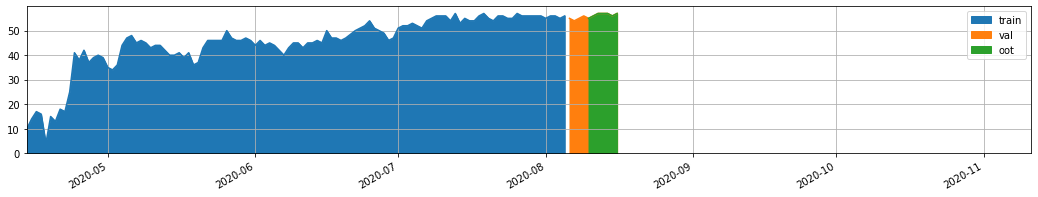

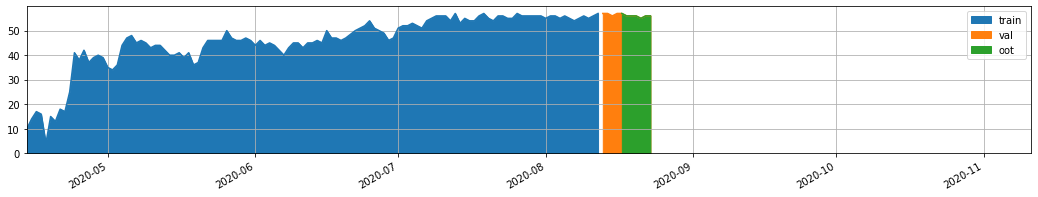

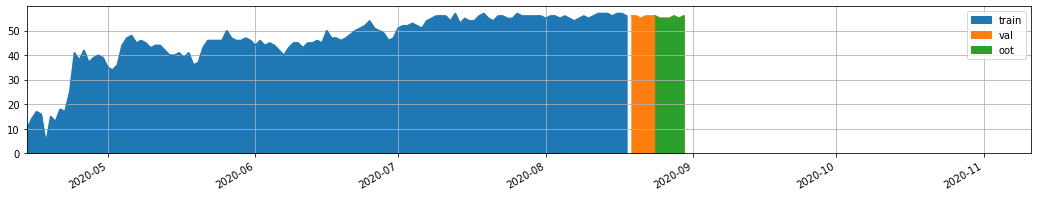

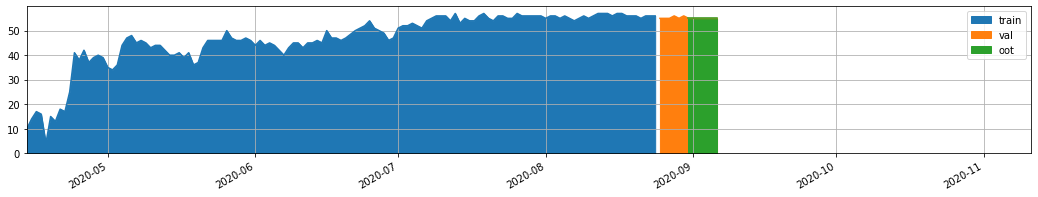

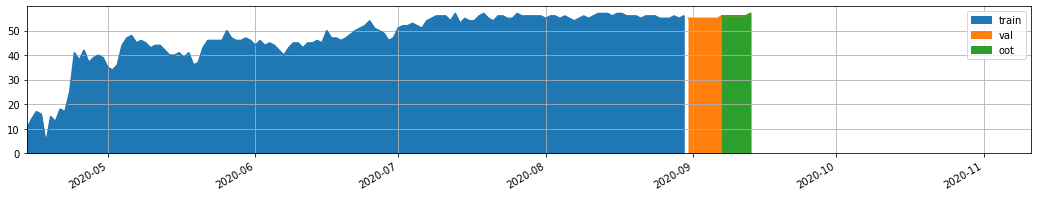

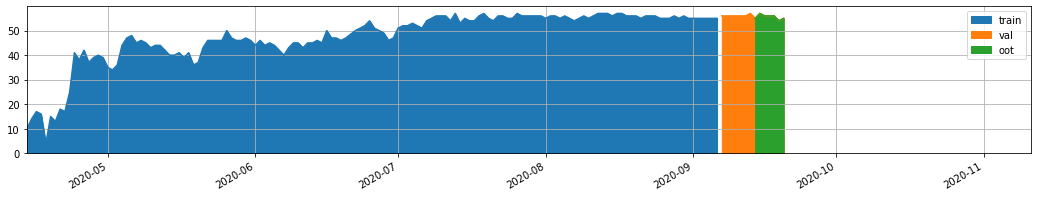

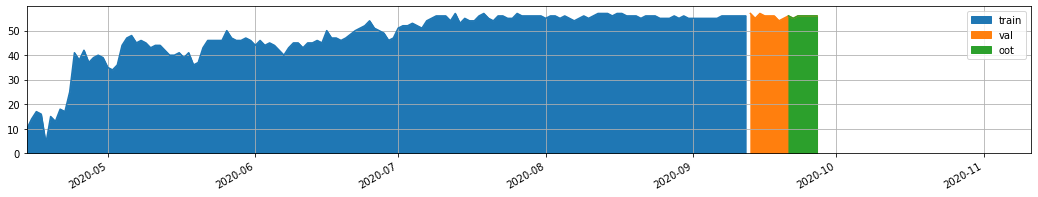

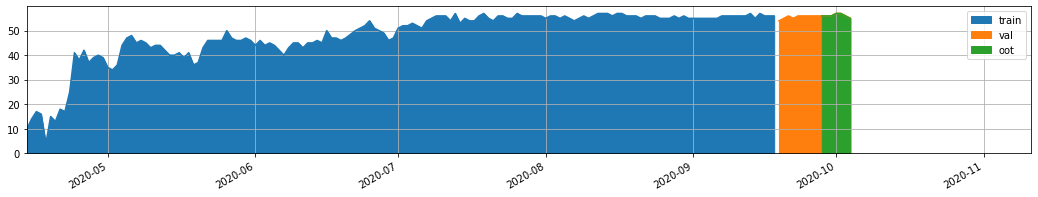

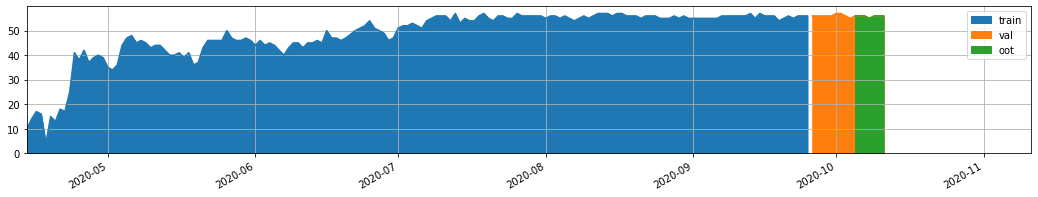

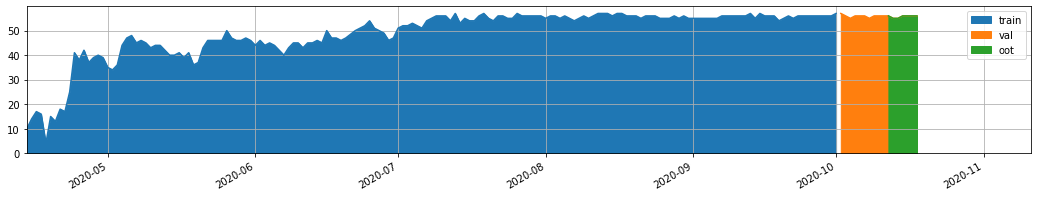

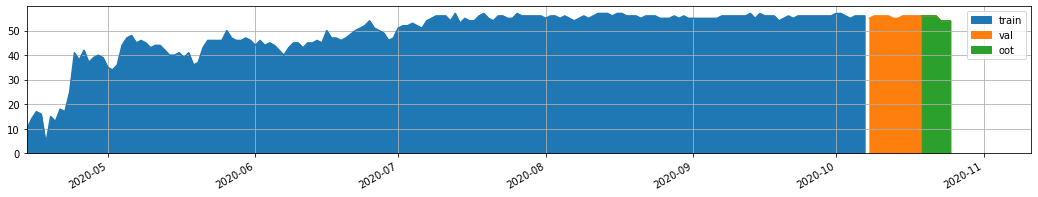

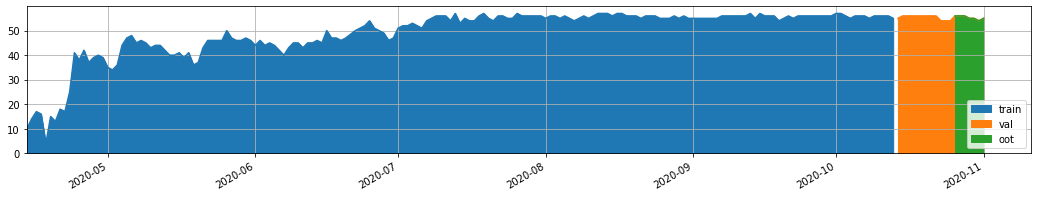

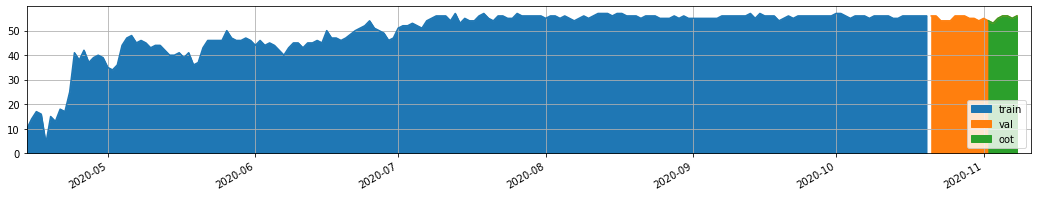

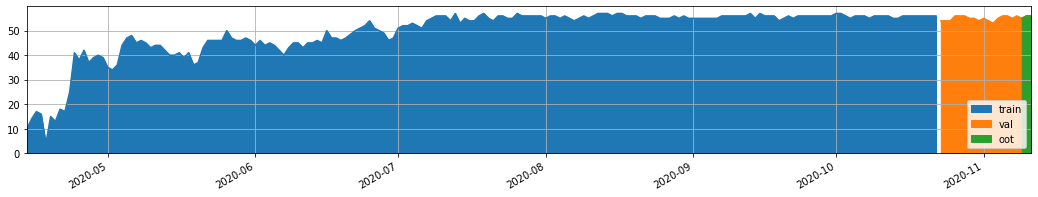

In [6]:
def plot_folds(X_train, X_val, X_oot):
    fig, ax = plt.subplots(1, 1, figsize=(18, 3))

    data_plot = train['fecha'].value_counts()
    data_plot.name = 'train'
    data_plot.plot(
        kind='area',
        grid=True,
        legend=True,
        ax=ax)

    data_plot = val['fecha'].value_counts()
    data_plot.name = 'val'
    data_plot.plot(
        kind='area',
        grid=True,
        legend=True, 
        ax=ax)

    data_plot = oot['fecha'].value_counts()
    data_plot.name = 'oot'
    data_plot.plot(
        kind='area',
        grid=True,
        legend=True, 
        ax=ax)
    ax.set_xlim(
        date2num(data['fecha'].min()),
        date2num(data['fecha'].max()))
    
    return fig, ax


def get_train_val(data, date):
    """
    """
    train = data[data['fecha'] <= date]

    oos_size = .1
    val_boundary = train['fecha'].quantile(1 - oos_size)

    val = train[train['fecha'] >= val_boundary]
    train = train[train['fecha'] < val_boundary]
    
    return train, val
    
    
    
for date, oot in experiment_rounds:
    oot.reset_index(inplace=True)
    
    train, val = get_train_val(data, date)
    
    plot_folds(train, val, oot)

[22:27:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.977169  0.230603  0.373147   3712.0   876.0  0.815109
1             0.321293  0.985423  0.484588   1372.0  4208.0  0.815109
avg / total   0.800170  0.434304  0.403221   5084.0  5084.0  0.815109 

val 
              precision    recall  f1-score  support   pred       AUC
0             0.955263  0.624785  0.755463    581.0  380.0  0.690088
1             0.072340  0.500000  0.126394     34.0  235.0  0.690088
avg / total   0.906451  0.617886  0.720685    615.0  615.0  0.690088 

oot 
              precision    re

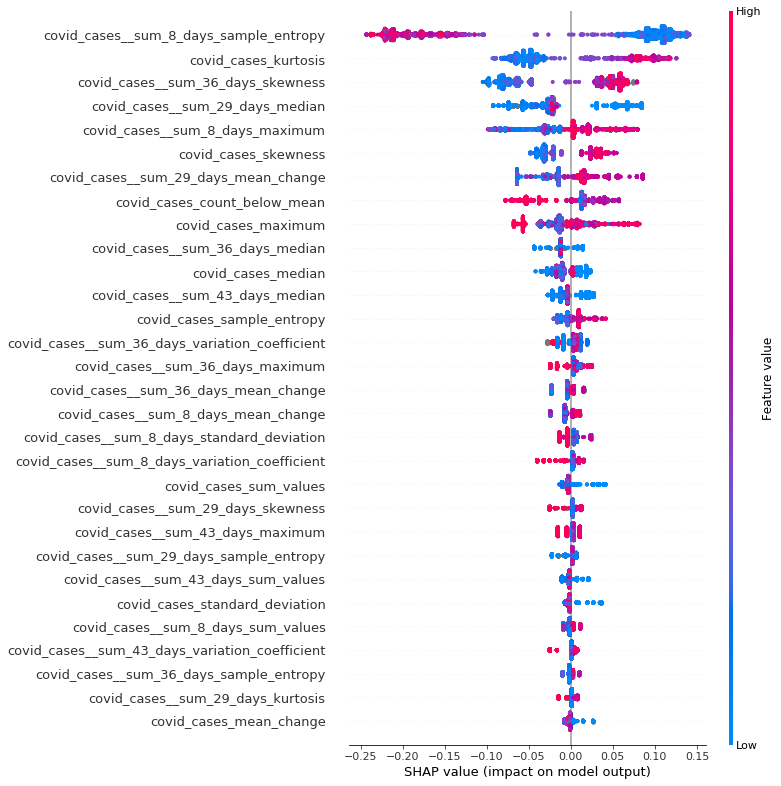

[22:27:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.982114  0.295861  0.454734   4083.0  1230.0  0.827645
1             0.322254  0.984161  0.485527   1389.0  4242.0  0.827645
avg / total   0.814616  0.470577  0.462550   5472.0  5472.0  0.827645 

val 
              precision    recall  f1-score  support   pred       AUC
0             0.967462  0.775652  0.861004    575.0  461.0  0.785474
1             0.183544  0.659091  0.287129     44.0  158.0  0.785474
avg / total   0.911739  0.767367  0.820211    619.0  619.0  0.785474 

oot 
              precision    re

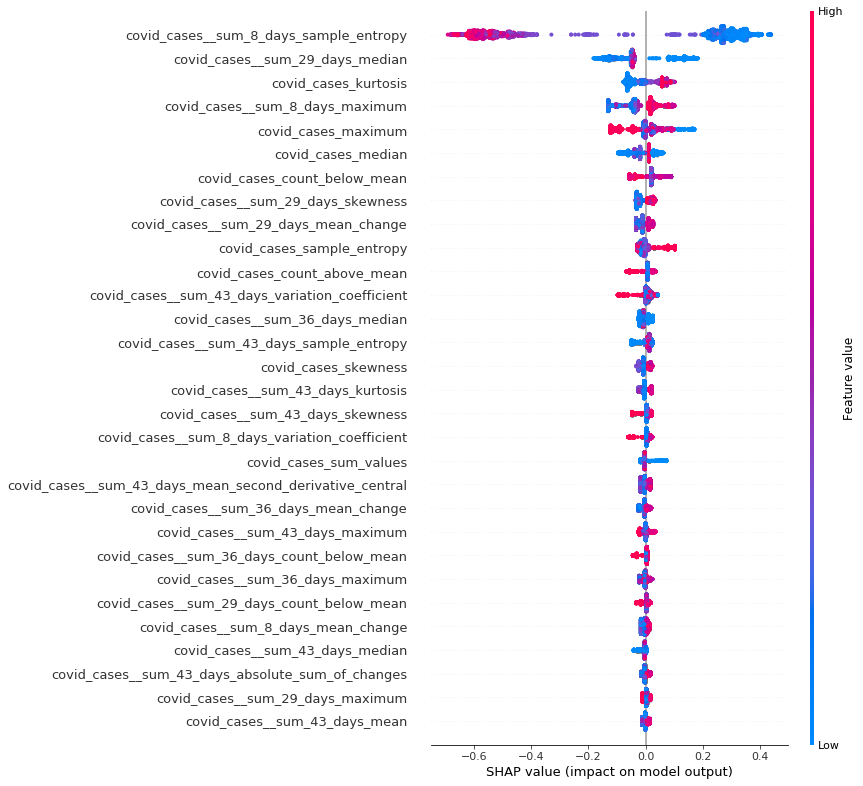

[22:27:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.996377  0.187628  0.315789   4397.0   828.0  0.849906
1             0.283307  0.997880  0.441319   1415.0  4984.0  0.849906
avg / total   0.822771  0.384893  0.346351   5812.0  5812.0  0.849906 

val 
              precision    recall  f1-score  support   pred       AUC
0             0.995157  0.650316  0.786603    632.0  413.0  0.895344
1             0.129921  0.942857  0.228374     35.0  254.0  0.895344
avg / total   0.949755  0.665667  0.757310    667.0  667.0  0.895344 

oot 
              precision    re

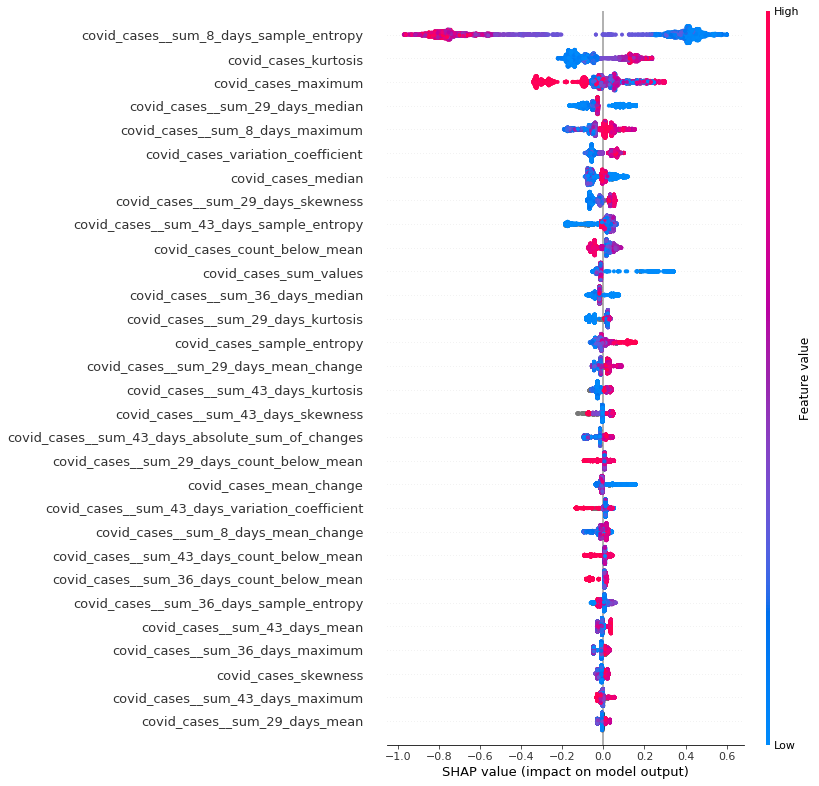

[22:27:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             1.000000  0.145829  0.254539   4711.0   687.0  0.861704
1             0.263004  1.000000  0.416473   1436.0  5460.0  0.861704
avg / total   0.827830  0.345372  0.292368   6147.0  6147.0  0.861704 

val 
              precision    recall  f1-score  support   pred       AUC
0             0.995204  0.598846  0.747748    693.0  417.0  0.935305
1             0.073333  0.916667  0.135802     24.0  300.0  0.935305
avg / total   0.964346  0.609484  0.727264    717.0  717.0  0.935305 

oot 
              precision    re

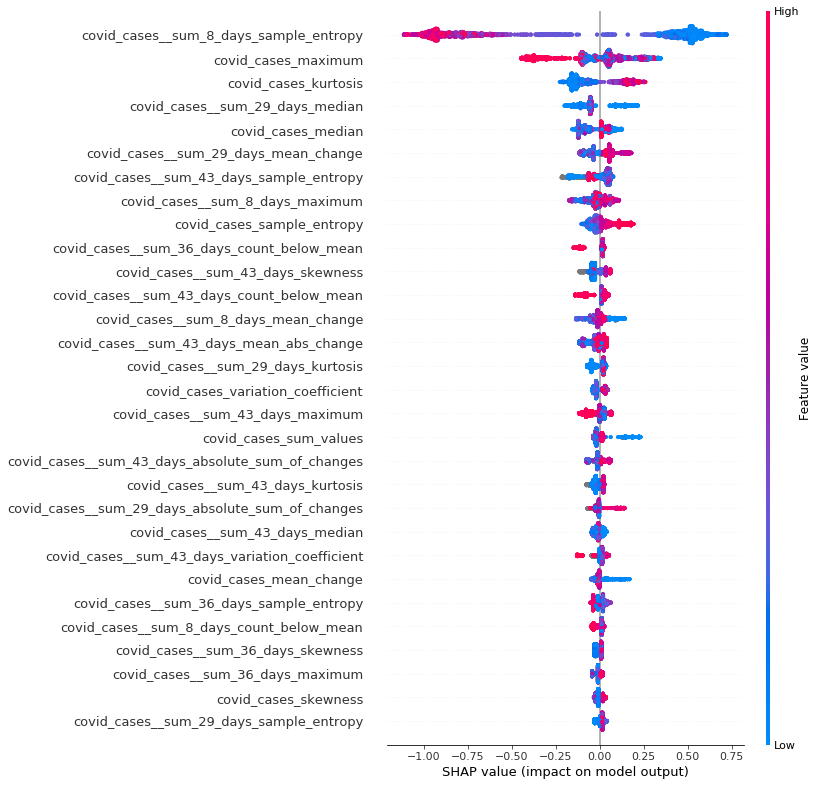

[22:27:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.997155  0.139392  0.244592   5029.0   703.0  0.838019
1             0.250693  0.998621  0.400775   1450.0  5776.0  0.838019
avg / total   0.830097  0.331687  0.279546   6479.0  6479.0  0.838019 

val 
              precision    recall  f1-score  support   pred       AUC
0             0.979592  0.649526  0.781123    739.0  490.0  0.793935
1             0.100694  0.743590  0.177370     39.0  288.0  0.793935
avg / total   0.935534  0.654242  0.750858    778.0  778.0  0.793935 

oot 
              precision    re

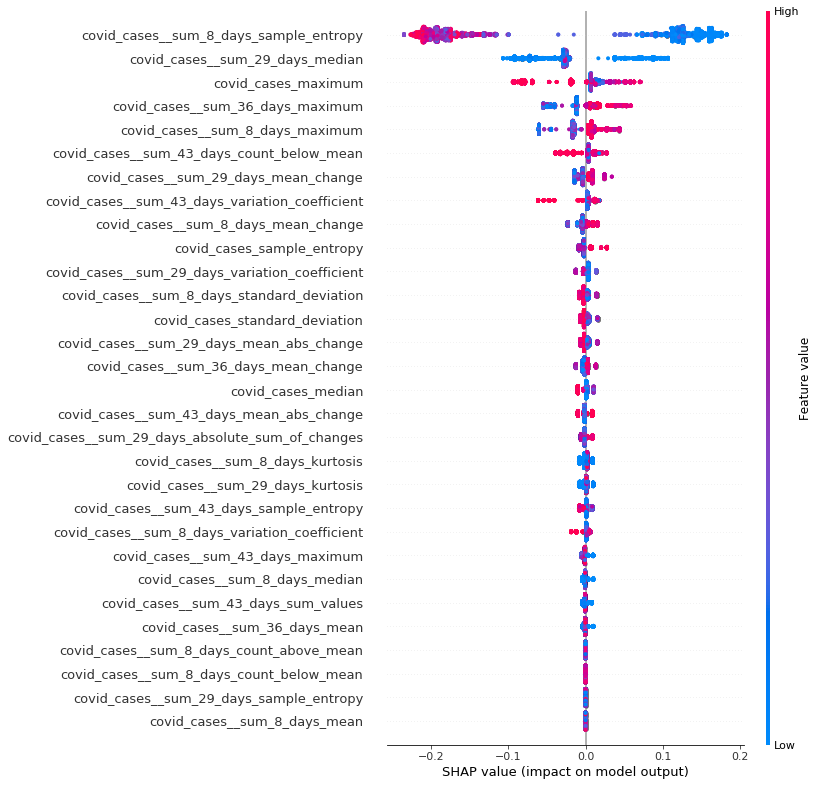

[22:27:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.997669  0.158401  0.273395   5404.0   858.0  0.864848
1             0.242757  0.998630  0.390571   1460.0  6006.0  0.864848
avg / total   0.837096  0.337121  0.298319   6864.0  6864.0  0.864848 

val 
              precision    recall  f1-score  support   pred      AUC
0             0.967672  0.612551  0.750209    733.0  464.0  0.78197
1             0.106918  0.693878  0.185286     49.0  318.0  0.78197
avg / total   0.913738  0.617647  0.714811    782.0  782.0  0.78197 

oot 
              precision    recall

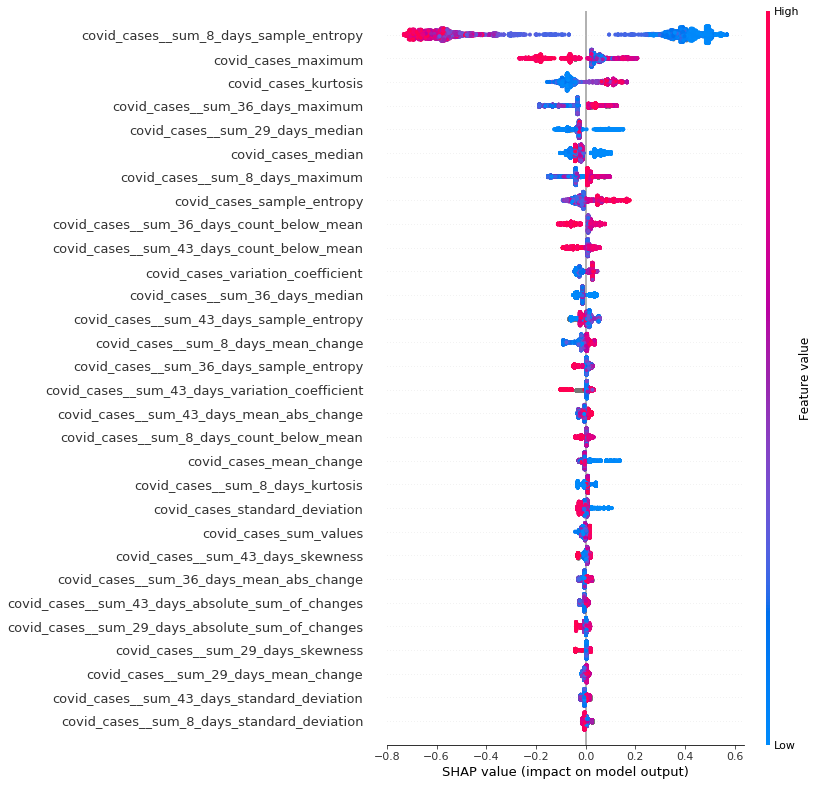

[22:27:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.998353  0.212036  0.349784   5716.0  1214.0  0.867056
1             0.247578  0.998652  0.396787   1484.0  5986.0  0.867056
avg / total   0.843610  0.374167  0.359472   7200.0  7200.0  0.867056 

val 
              precision    recall  f1-score  support   pred       AUC
0             0.979684  0.543179  0.698873    799.0  443.0  0.815361
1             0.073604  0.763158  0.134259     38.0  394.0  0.815361
avg / total   0.938548  0.553166  0.673239    837.0  837.0  0.815361 

oot 
              precision    re

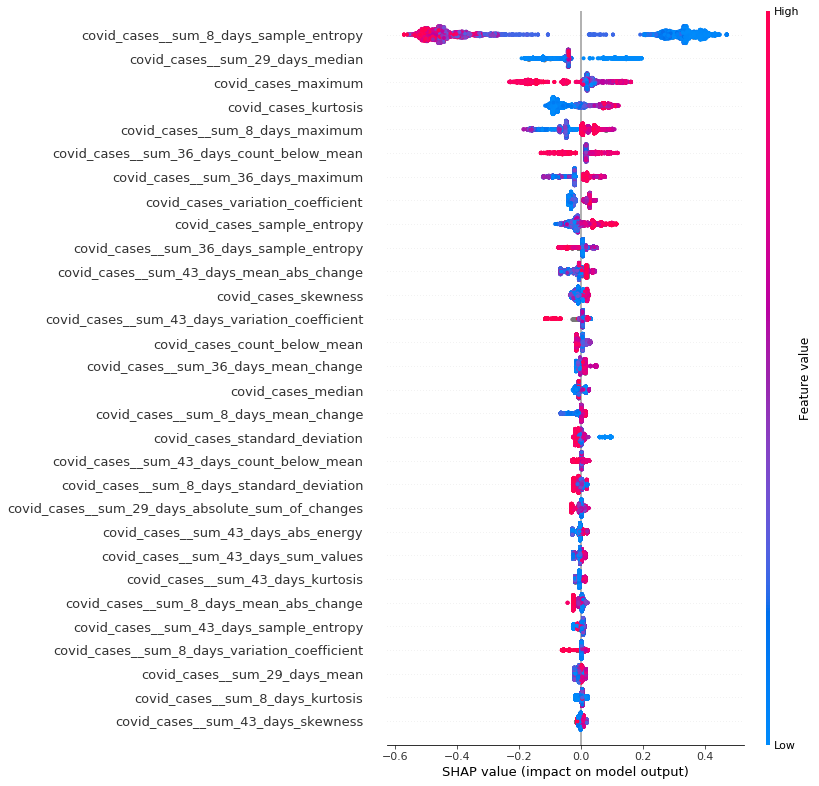

[22:27:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred      AUC
0             0.995590  0.299403  0.460362   6032.0  1814.0  0.87553
1             0.261576  0.994684  0.414222   1505.0  5723.0  0.87553
avg / total   0.849021  0.438238  0.451149   7537.0  7537.0  0.87553 

val 
              precision    recall  f1-score  support   pred       AUC
0             0.994382  0.616725  0.761290    861.0  534.0  0.842752
1             0.080780  0.906250  0.148338     32.0  359.0  0.842752
avg / total   0.961644  0.627100  0.739326    893.0  893.0  0.842752 

oot 
              precision    recall

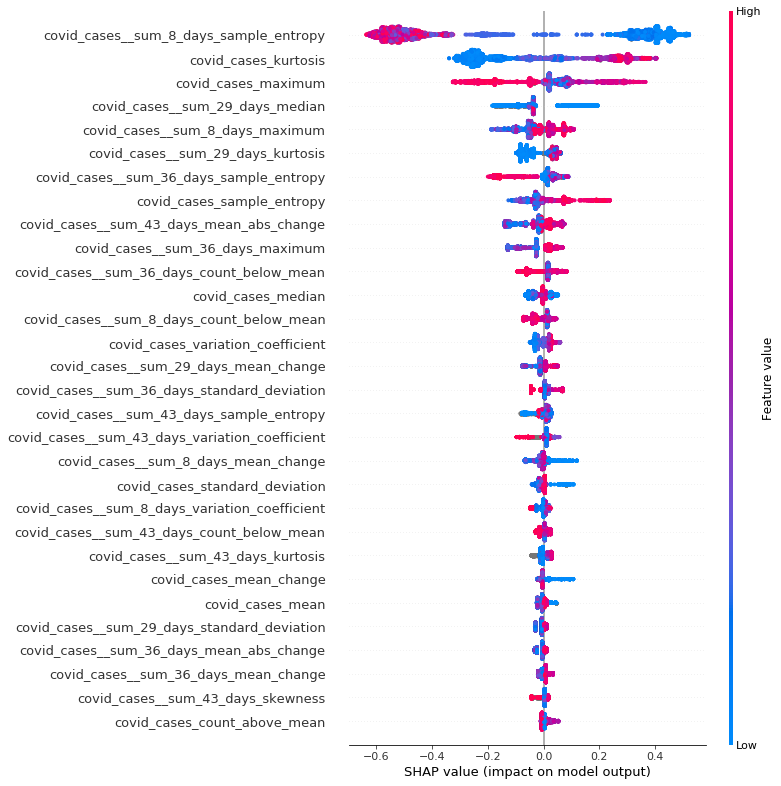

[22:27:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.997332  0.291712  0.451395   6407.0  1874.0  0.869188
1             0.250041  0.996706  0.399789   1518.0  6051.0  0.869188
avg / total   0.854192  0.426751  0.441510   7925.0  7925.0  0.869188 

val 
              precision    recall  f1-score  support   pred       AUC
0             0.991435  0.537747  0.697289    861.0  467.0  0.850124
1             0.072261  0.885714  0.133621     35.0  429.0  0.850124
avg / total   0.955529  0.551339  0.675271    896.0  896.0  0.850124 

oot 
              precision    re

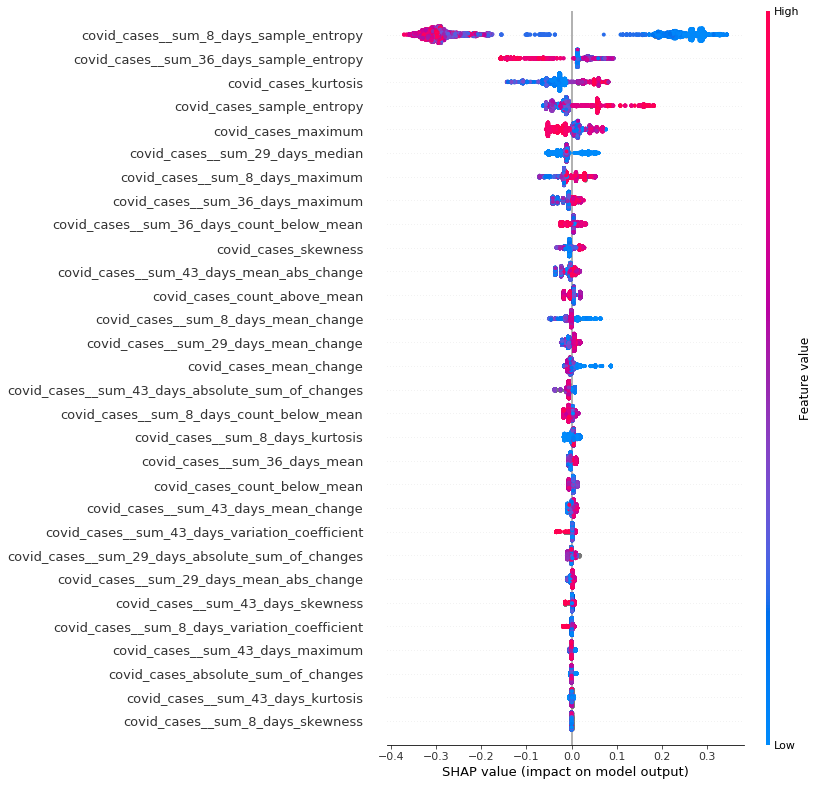

[22:27:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.997732  0.326846  0.492390   6731.0  2205.0  0.870329
1             0.251940  0.996734  0.402214   1531.0  6057.0  0.870329
avg / total   0.859532  0.450980  0.475680   8262.0  8262.0  0.870329 

val 
              precision    recall  f1-score  support   pred       AUC
0             0.982692  0.569042  0.720733    898.0  520.0  0.802044
1             0.097902  0.823529  0.175000     51.0  429.0  0.802044
avg / total   0.935143  0.582719  0.691405    949.0  949.0  0.802044 

oot 
              precision    re

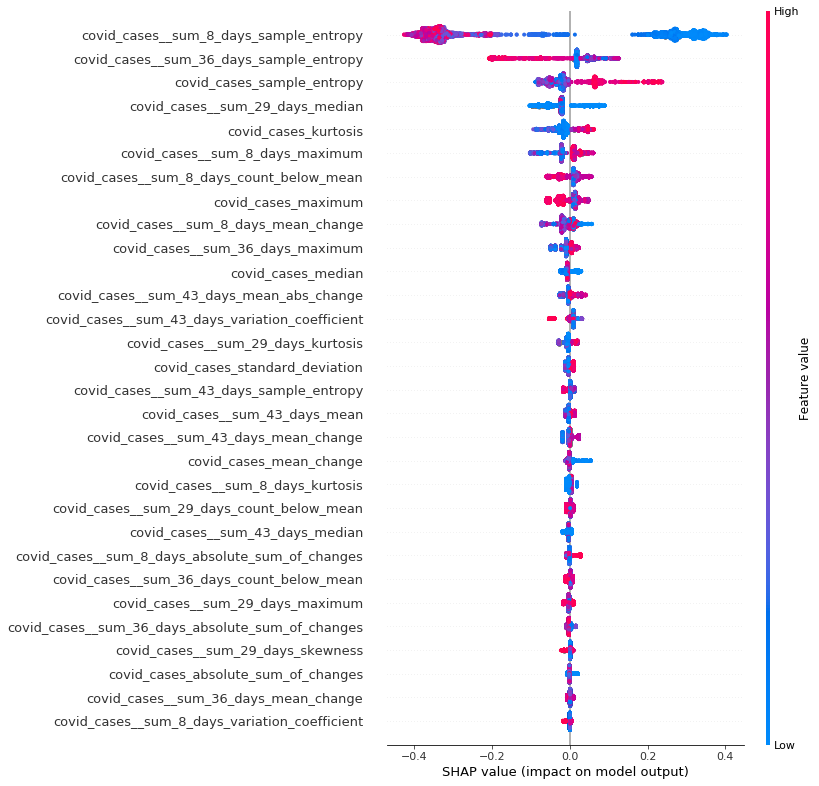

[22:27:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.994245  0.416124  0.586696   7058.0  2954.0  0.879053
1             0.269844  0.988961  0.423998   1540.0  5644.0  0.879053
avg / total   0.864497  0.518725  0.557555   8598.0  8598.0  0.879053 

val 
              precision    recall  f1-score  support   pred       AUC
0             0.977044  0.737013  0.840222    924.0  697.0  0.828074
1             0.195364  0.786667  0.312997     75.0  302.0  0.828074
avg / total   0.918360  0.740741  0.800641    999.0  999.0  0.828074 

oot 
              precision    re

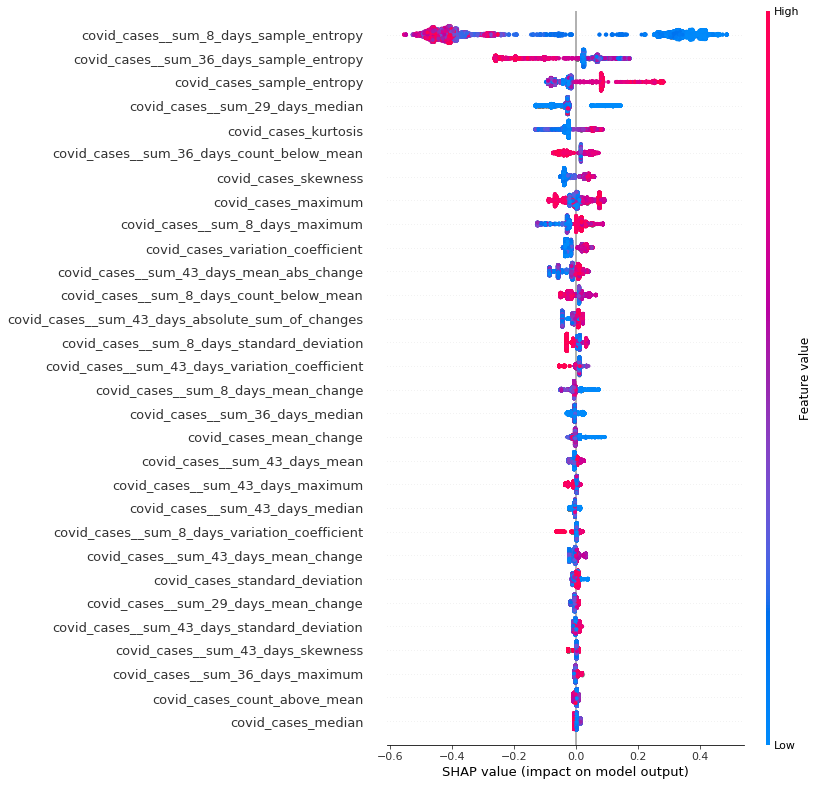

[22:27:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.992420  0.497287  0.662570   7372.0  3694.0  0.883117
1             0.292478  0.982051  0.450721   1560.0  5238.0  0.883117
avg / total   0.870173  0.581953  0.625570   8932.0  8932.0  0.883117 

val 
              precision    recall  f1-score  support    pred       AUC
0             0.970623  0.848049  0.905205    974.0   851.0  0.838309
1             0.263682  0.679487  0.379928     78.0   201.0  0.838309
avg / total   0.918207  0.835551  0.866259   1052.0  1052.0  0.838309 

oot 
              precision  

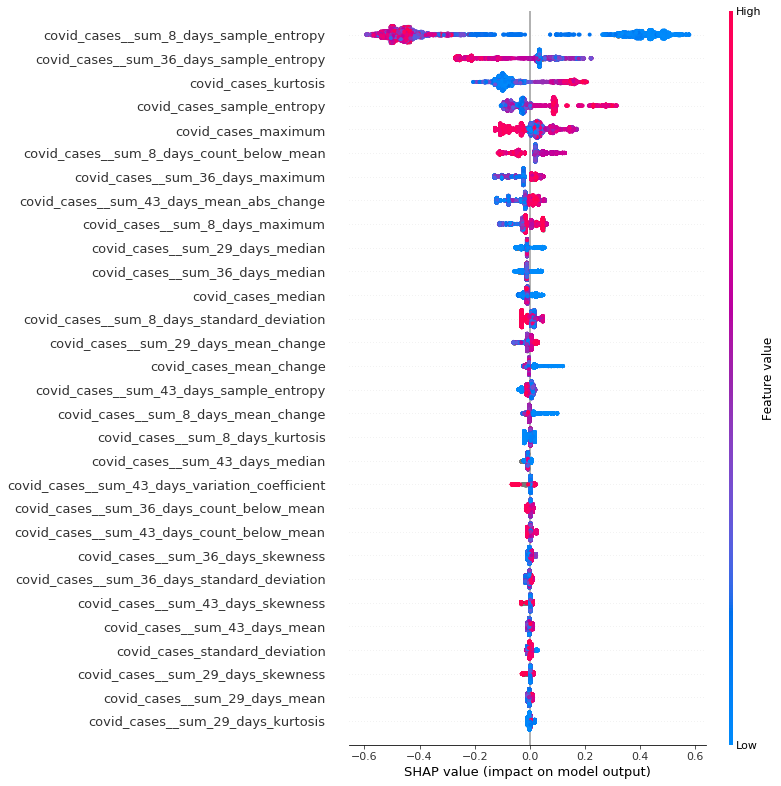

[22:28:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.996124  0.432212  0.602851   7730.0  3354.0  0.885224
1             0.264701  0.991839  0.417879   1593.0  5969.0  0.885224
avg / total   0.871147  0.527834  0.571245   9323.0  9323.0  0.885224 

val 
              precision    recall  f1-score  support    pred       AUC
0             1.000000  0.648731  0.786946    985.0   639.0  0.898452
1             0.149877  1.000000  0.260684     61.0   407.0  0.898452
avg / total   0.950423  0.669216  0.756256   1046.0  1046.0  0.898452 

oot 
              precision  

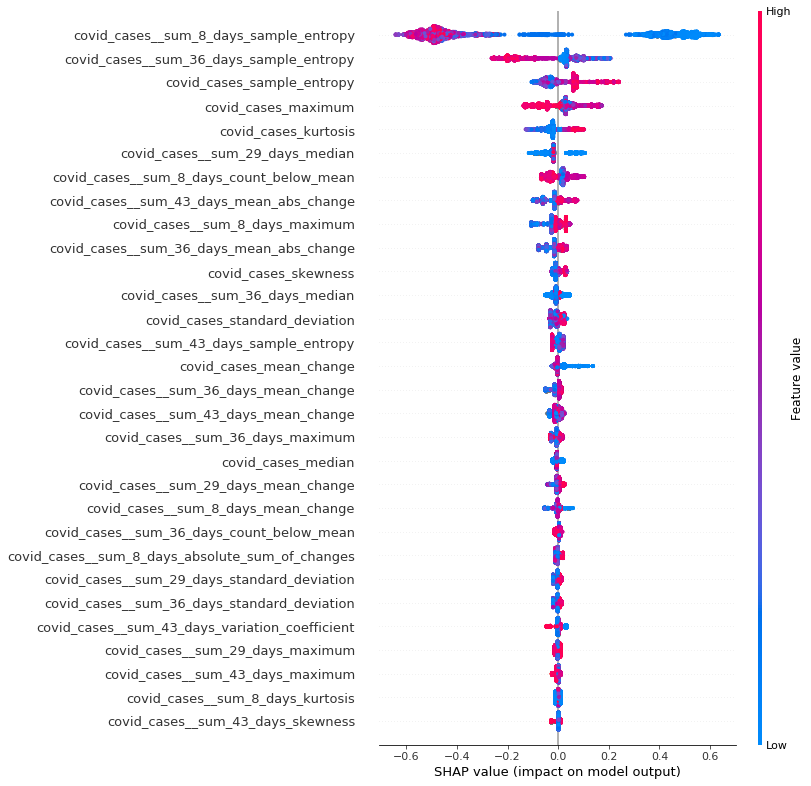

[22:28:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { col_subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train 
              precision    recall  f1-score  support    pred       AUC
0             0.988989  0.573563  0.726053   7830.0  4541.0  0.885069
1             0.317736  0.968847  0.478535   1605.0  4894.0  0.885069
avg / total   0.874801  0.640806  0.683947   9435.0  9435.0  0.885069 

val 
              precision    recall  f1-score  support    pred       AUC
0             0.992857  0.665709  0.797018   1044.0   700.0  0.892855
1             0.129676  0.912281  0.227074     57.0   401.0  0.892855
avg / total   0.948169  0.678474  0.767512   1101.0  1101.0  0.892855 

oot 
              precision  

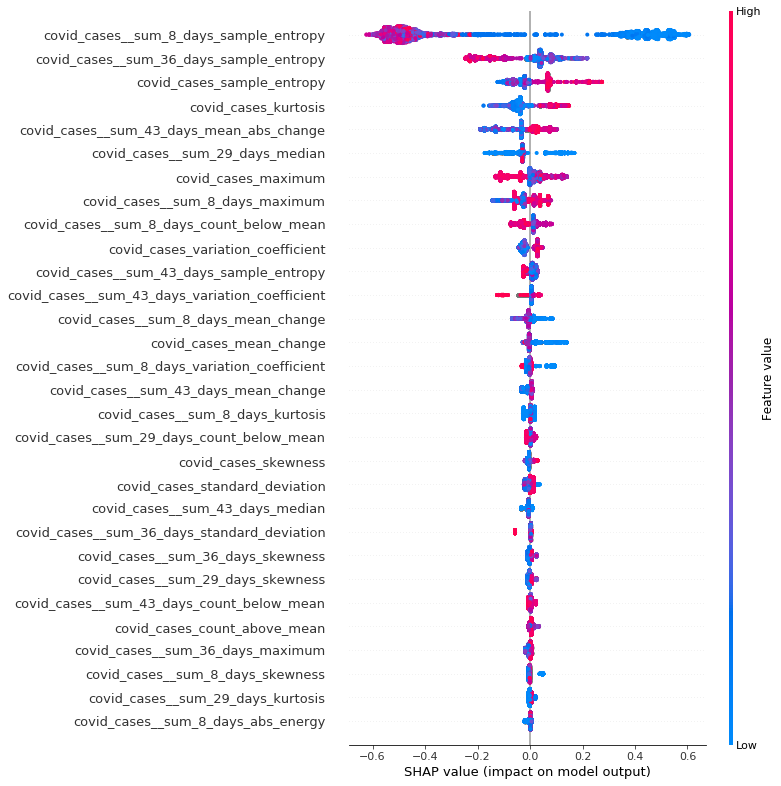

In [7]:
reports, feature_importance, dates = [], [], []
for date, oot in experiment_rounds:
    dates.append(date)
    oot.reset_index(inplace=True)
    
    # Split data
    train, val = get_train_val(data, date)
    
    # Get X matrix and y.
    X_train = train.set_index(['fecha', 'nombre_hospital']).copy()
    X_train.drop(list(set(X_train.columns).intersection(train_data._TARGETS)), axis=1, inplace=True)
    y_train = train.set_index(['fecha', 'nombre_hospital'])[target]

    X_val = val.set_index(['fecha', 'nombre_hospital']).copy()
    X_val.drop(list(set(X_val.columns).intersection(train_data._TARGETS)), axis=1, inplace=True)
    y_val = val.set_index(['fecha', 'nombre_hospital'])[target]

    X_oot = oot.set_index(['fecha', 'nombre_hospital']).copy()
    X_oot.drop(list(set(X_oot.columns).intersection(train_data._TARGETS)), axis=1, inplace=True)
    y_oot = oot.set_index(['fecha', 'nombre_hospital'])[target]
       
    # Train model
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
    model = xgb.XGBClassifier(
        subsample=.7,
        col_subsample=.5,
        max_depth=4,
        learning_rate=.05,
        min_child_weight=100,
        scale_pos_weight=scale_pos_weight)

    model.fit(
        X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        eval_metric=['logloss', 'auc'],
        early_stopping_rounds=10,
        verbose=False)

    # Evaluate
    y_train_score = model.predict_proba(X_train)
    y_val_score = model.predict_proba(X_val)
    y_oot_score = model.predict_proba(X_oot)
    
    score_th = pd.Series(y_oot_score[:, 1]).quantile(.5)
    
    report_train = eval_utils.classification_report(
        y_true=y_train, 
        y_score=y_train_score, 
        y_pred=(y_train_score[:, 1] > score_th).astype(int))

    report_val = eval_utils.classification_report(
        y_true=y_val, 
        y_score=y_val_score, 
        y_pred=(y_val_score[:, 1] > score_th).astype(int))

    report_oot = eval_utils.classification_report(
        y_true=y_oot, 
        y_score=y_oot_score, 
        y_pred=(y_oot_score[:, 1] > score_th).astype(int))
    
    local_reports = {
        'train': report_train,
        'val': report_val,
        'oot': report_oot,
        'date': date}
    reports.append(local_reports)
    
    [print(l,'\n', r, '\n') for l, r in local_reports.items()]
    
    # Plot feature importance
    fig, ax = plt.subplots(1, 1)
    explainer = shap.TreeExplainer(model)
    
    shaps_values = pd.DataFrame(
        explainer.shap_values(X_train),
        columns=X_train.columns)

    shap.summary_plot(
        shaps_values.values, 
        X_train,
        max_display=30)
    
    feature_importance.append(shaps_values.abs().sum(axis=0).sort_values())
    
feature_importance = pd.DataFrame(
    feature_importance,
    index=dates)

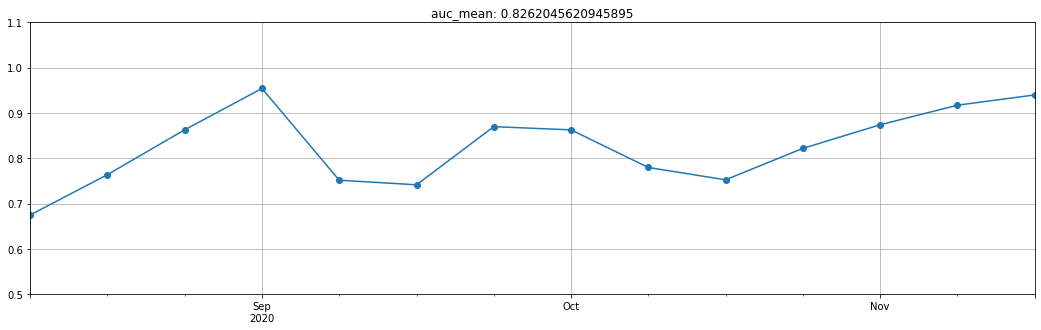

In [8]:
auc = pd.Series([r['oot']['AUC']['avg / total'] for r in reports])
auc.index = [r['date'] for r in reports]

auc_mean = auc.mean()

auc.plot(
    marker='o',
    grid=True,
    figsize=(18, 5),
    ylim=(.5, 1.1),
    title='auc_mean: %s' % auc_mean)

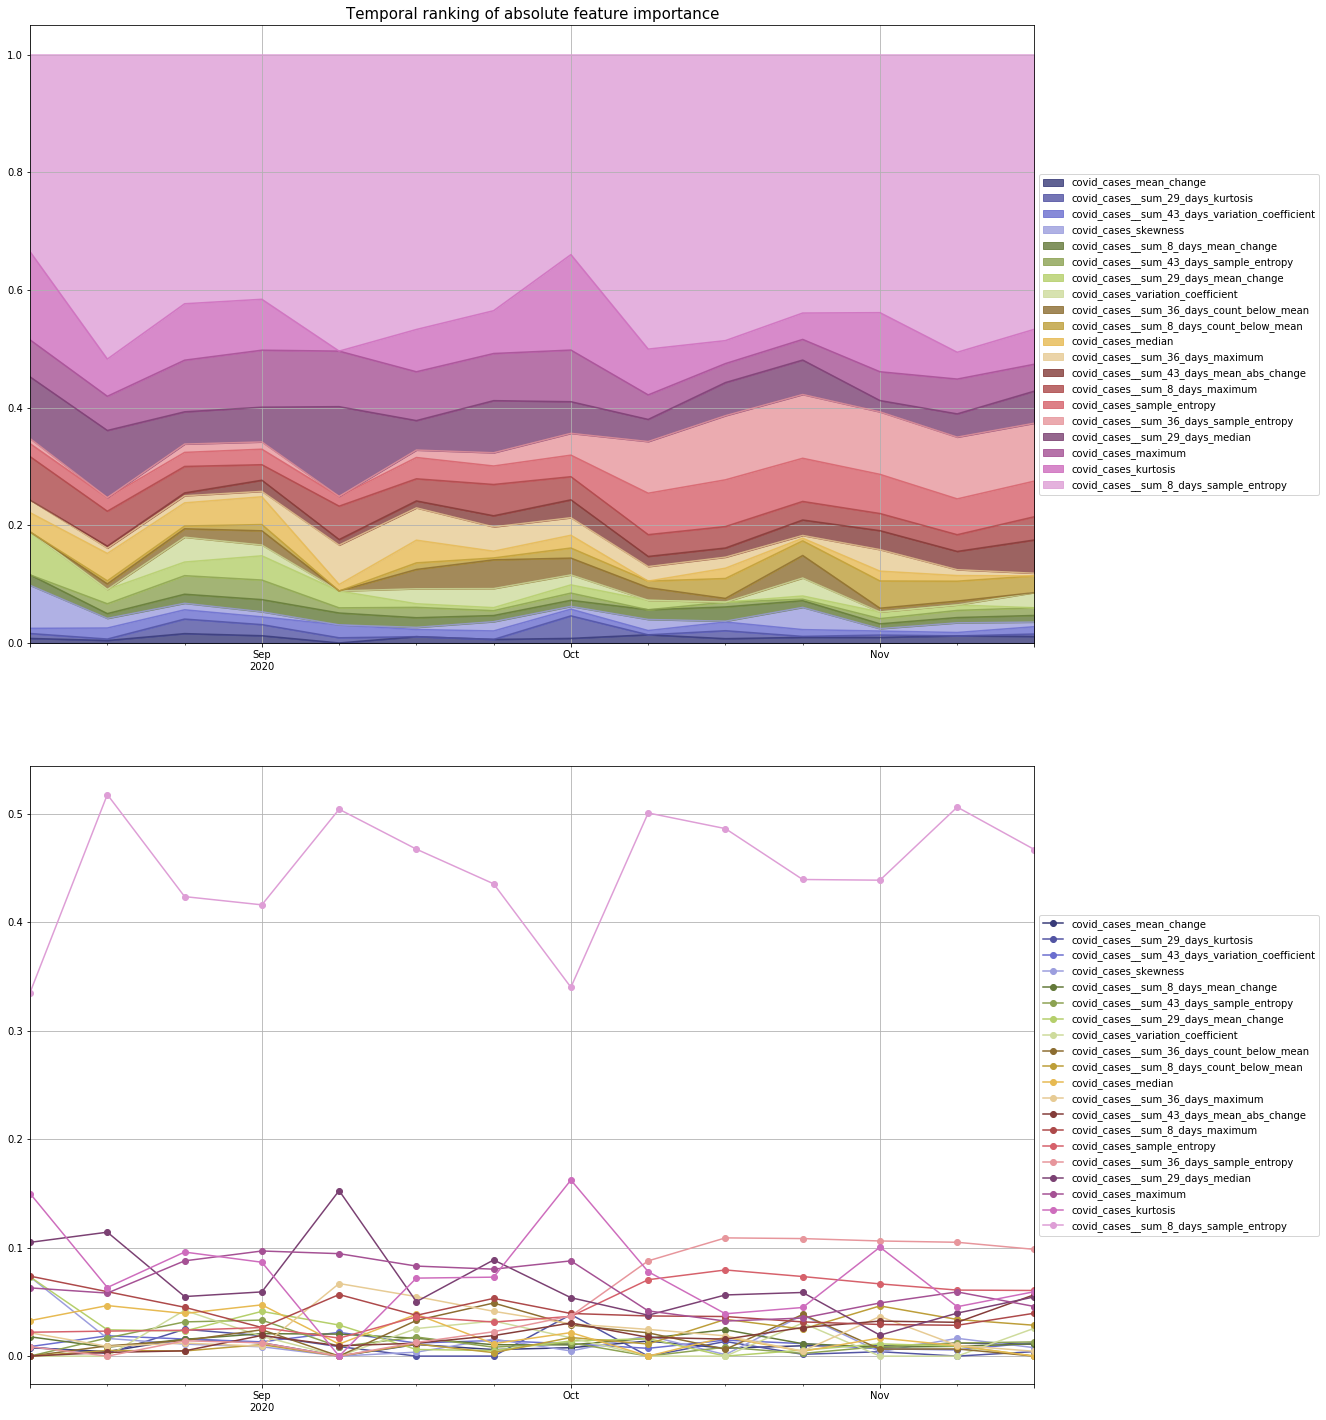

In [11]:
data_plot = feature_importance[feature_importance.sum().sort_values().iloc[-20:].index]
data_plot = (data_plot.T / data_plot.sum(axis=1)).T

fig, ax = plt.subplots(2, 1, figsize=(18, 25))
data_plot.plot(
    kind='area',
    stacked=True,
    ax=ax[0],
    grid=True,
    alpha=.8,
    cmap='tab20b')

data_plot.plot(
    marker='o', 
    ax=ax[1],
    cmap='tab20b',
    legend=False,
    grid=True)
ax[0].set_title('Temporal ranking of absolute feature importance', fontsize=15)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5));